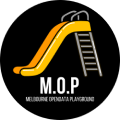

#**MELBOURNE CITY OPEN DATA PLAYGROUND**

#**Use-Case 1 : Melbourne Bicycle Network Routes and Road Safety**

##Exploratory Data Analysis

Date : 01-May-2022	
Contributor : Steven Tuften	
Initial Draft

**Package/Library Imports**

In [2]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Melbourne Bicycle Accidents
Bicycle  collisions reported by the Victorian  Police Department from 2017-16. Each record represents an individual collision, including the date, time and road location of the accident ,road location name,location type, latitude/longitude, event type  and victims involved etc

**LOAD THE DATASET**

In [3]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/T1_2022/Project/data/Accidents_Bicyclists_Melbourne_2017to2020.csv')
dataset.head(5)

KEYAccidentNumber DATAccidentDate_accident        TIMAccidentTime_accident  \
0      T20170000296               2017-01-06  08:10:00                         
1      T20170000434               2017-01-09  08:18:00                         
2      T20170000451               2017-01-09  13:00:00                         
3      T20170000462               2017-01-09  18:00:00                         
4      T20170000509               2017-01-09  08:48:00                         

        CATAccidentTypeDesc_accident CATDayOfWeek_accident  \
0  No collision and no object struck                Friday   
1             Collision with vehicle                Monday   
2             Collision with vehicle                Monday   
3             Collision with vehicle                Monday   
4             Collision with vehicle                Monday   

                                 CATDCADesc_accident CATMelwaysPage_accident  \
0  OTHER ACCIDENTS-OFF STRAIGHT NOT INCLUDED IN D...                      2L   
1  VEHICLE STRIKES DOOR OF PARKED/STATIONARY VEHI...                      2F   
2           RIGHT TURN SIDESWIPE                                          29   
3              RIGHT THROUGH                                              2B   
4  OTHER SAME DIRECTION-MANOUEVRES NOT INCLUDED I...                           

  CATMelwaysGridRef_X_accident CATMelwaysGridRef_Y_accident  \
0                            B                            8   
1                            K                            3   
2                            G                           10   
3                            H                            5   
4                                                             

  CATLightConditionDesc_accident  ...  CATPostcode_node  \
0                            Day  ...              3004   
1                            Day  ...              3002   
2                            Day  ...              3056   
3                            Day  ...              3053   
4                            Day  ...              3004   

   CATSurfaceConditionDesc_surface  CATSubDCACodeDesc_subdca  \
0                              Dry              Not Required   
1                              Dry              Not Required   
2                              Dry              Intersection   
3                              Dry              Not Required   
4                              Dry              Not Required   

  CATAtmosphericConditionDesc_atmosphere CATRoadName_acclocation  \
0                                  Clear                ST KILDA   
1                                  Clear               MACARTHUR   
2                                  Clear    ROYAL PARADE -SYDNEY   
3                                  Clear               RATHDOWNE   
4                                  Clear                ST KILDA   

  CATRoadNameInt_acclocation CATRoadType_acclocation  \
0                      HANNA                    ROAD   
1                 ST ANDREWS                  STREET   
2                 THE AVENUE                    ROAD   
3                     COLGAN                  STREET   
4                     SLATER                    ROAD   

  CATRoadTypeInt_acclocation    CATEventTypeDesc_accevent  \
0                     STREET  Rollover on/off carriageway   
1                      PLACE                    Collision   
2                        NaN                    Collision   
3                     STREET                    Collision   
4                     STREET                    Collision   

  CATObjectTypeDesc_accevent  
0             Not Applicable  
1             Not Applicable  
2             Not Applicable  
3             Not Applicable  
4             Not Applicable  

[5 rows x 34 columns]

**Understanding the Data**

In [4]:
# Shape of the Dataset

print("Shape of the dataset : ",dataset.shape)
print()
print()
print('Dataset Info')
print()
# display all columns and their data types
print(dataset.info())

Shape of the dataset :  (735, 34)


Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   KEYAccidentNumber                       735 non-null    object 
 1   DATAccidentDate_accident                735 non-null    object 
 2   TIMAccidentTime_accident                735 non-null    object 
 3   CATAccidentTypeDesc_accident            735 non-null    object 
 4   CATDayOfWeek_accident                   735 non-null    object 
 5   CATDCADesc_accident                     735 non-null    object 
 6   CATMelwaysPage_accident                 735 non-null    object 
 7   CATMelwaysGridRef_X_accident            735 non-null    object 
 8   CATMelwaysGridRef_Y_accident            735 non-null    object 
 9   CATLightConditionDesc_accident          735 non-null    object 
 10  NUMVehiclesI

In [5]:
dataset.describe()

NUMVehiclesInvolved_accident  NUMPersonsInvolved_accident  \
count                    735.000000                   735.000000   
mean                       2.006803                     2.193197   
std                        0.336203                     0.627010   
min                        1.000000                     1.000000   
25%                        2.000000                     2.000000   
50%                        2.000000                     2.000000   
75%                        2.000000                     2.000000   
max                        4.000000                     7.000000   

       NUMPersonsInjured_accident  CATPostcode_person  NUMLatitude_node  \
count                  735.000000          605.000000        735.000000   
mean                     0.182313         3102.104132        -37.809117   
std                      0.396803          255.099002          0.013440   
min                      0.000000         2036.000000        -37.850219   
25%                      0.000000         3032.000000        -37.816397   
50%                      0.000000         3056.000000        -37.810357   
75%                      0.000000         3121.000000        -37.800148   
max                      2.000000         7315.000000        -37.775968   

       NUMLongitude_node  CATPostcode_node  
count         735.000000        735.000000  
mean          144.960465       3017.976871  
std             0.014090         25.054290  
min           144.912789       3000.000000  
25%           144.954946       3000.000000  
50%           144.961692       3004.000000  
75%           144.969411       3051.000000  
max           144.990095       3207.000000

Data Cleaning

We need to make sure the data is clean before starting your analysis. As a reminder, we should check for:

- Duplicate records
- Consistent formatting
- Missing values
- Obviously wrong values (x)

#### Duplicate Records
How many duplicate transaction records are there? 

In [6]:
dup_rows = dataset.duplicated().sum()
dup_rows 

0

There is no need to use the drop_duplicates() function because there are no duplicate records.

Consistent formatting

In [7]:
dataset["datetime"] = dataset["DATAccidentDate_accident"]+ ' ' +  dataset["TIMAccidentTime_accident"]
dataset["datetime"]=pd.to_datetime(dataset.datetime) 

Missing Percentage 



In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = dataset.select_dtypes(include=numerics)
len(newdf.columns)

7

In [9]:
missing_percentage=dataset.isna().sum().sort_values(ascending=False)/len(dataset)
missing_percentage

CATPostcode_person                        0.176871
CATRoadTypeInt_acclocation                0.027211
CATRoadNameInt_acclocation                0.012245
CATRoadType_acclocation                   0.006803
CATRoadName_acclocation                   0.001361
KEYAccidentNumber                         0.000000
CATPostcode_node                          0.000000
CATLGAName_node                           0.000000
CATDEGUrbanName_node                      0.000000
NUMLatitude_node                          0.000000
NUMLongitude_node                         0.000000
CATAtmosphericConditionDesc_atmosphere    0.000000
CATSurfaceConditionDesc_surface           0.000000
CATSubDCACodeDesc_subdca                  0.000000
CATEventTypeDesc_accevent                 0.000000
CATObjectTypeDesc_accevent                0.000000
CATGender_person                          0.000000
CATAgeGroup_person                        0.000000
DATAccidentDate_accident                  0.000000
CATMelwaysGridRef_Y_accident   

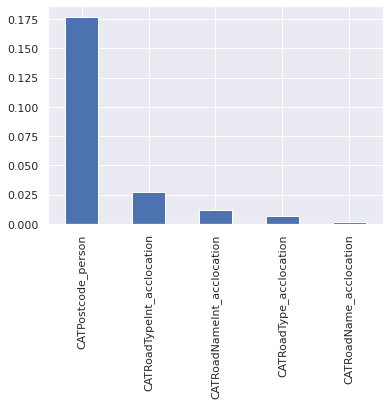

In [10]:
missing_percentage[missing_percentage !=0].plot(kind='bar')


In [11]:
dataset.head(10)

KEYAccidentNumber DATAccidentDate_accident        TIMAccidentTime_accident  \
0      T20170000296               2017-01-06  08:10:00                         
1      T20170000434               2017-01-09  08:18:00                         
2      T20170000451               2017-01-09  13:00:00                         
3      T20170000462               2017-01-09  18:00:00                         
4      T20170000509               2017-01-09  08:48:00                         
5      T20170000509               2017-01-09  08:48:00                         
6      T20170000555               2017-01-11  08:20:00                         
7      T20170000650               2017-01-10  12:30:00                         
8      T20170000671               2017-01-12  17:56:00                         
9      T20170000868               2017-01-15  13:40:00                         

        CATAccidentTypeDesc_accident CATDayOfWeek_accident  \
0  No collision and no object struck                Friday   
1             Collision with vehicle                Monday   
2             Collision with vehicle                Monday   
3             Collision with vehicle                Monday   
4             Collision with vehicle                Monday   
5             Collision with vehicle                Monday   
6             Collision with vehicle             Wednesday   
7             Collision with vehicle               Tuesday   
8             Collision with vehicle              Thursday   
9             Collision with vehicle                Sunday   

                                 CATDCADesc_accident CATMelwaysPage_accident  \
0  OTHER ACCIDENTS-OFF STRAIGHT NOT INCLUDED IN D...                      2L   
1  VEHICLE STRIKES DOOR OF PARKED/STATIONARY VEHI...                      2F   
2           RIGHT TURN SIDESWIPE                                          29   
3              RIGHT THROUGH                                              2B   
4  OTHER SAME DIRECTION-MANOUEVRES NOT INCLUDED I...                           
5  OTHER SAME DIRECTION-MANOUEVRES NOT INCLUDED I...                           
6              RIGHT THROUGH                                                   
7  VEHICLE STRIKES ANOTHER VEH WHILE EMERGING FRO...                           
8           LEFT TURN SIDESWIPE                                           2E   
9    CROSS TRAFFIC(INTERSECTIONS ONLY)                                    2F   

  CATMelwaysGridRef_X_accident CATMelwaysGridRef_Y_accident  \
0                            B                            8   
1                            K                            3   
2                            G                           10   
3                            H                            5   
4                                                             
5                                                             
6                                                             
7                                                             
8                            G                           10   
9                            G                           12   

  CATLightConditionDesc_accident  ...  CATSurfaceConditionDesc_surface  \
0                            Day  ...                              Dry   
1                            Day  ...                              Dry   
2                            Day  ...                              Dry   
3                            Day  ...                              Dry   
4                            Day  ...                              Dry   
5                            Day  ...                              Dry   
6                            Day  ...                              Dry   
7                            Day  ...                              Dry   
8                            Day  ...                              Dry   
9                            Day  ...                              Dry   

                            CATSubDCACodeDesc_su

In [12]:
# The Number of bicycle accidents per year 
dataset['year'] = pd.DatetimeIndex(dataset['DATAccidentDate_accident']).year
count_accidents_year = dataset.groupby(['year'])['KEYAccidentNumber'].count().reset_index(name='Count of Accidents per year')
count_accidents_year

year  Count of Accidents per year
0  2017                          229
1  2018                          209
2  2019                          226
3  2020                           71

The number of bicycle accidents by road location (concatenation of road name + road type) and by accident year (i.e 2017, 2018, 2019). Omiting 2020 as it is not a fully developed accident year because the date range stops at March 2020.

In [13]:

dataset["accident_by_road_loc"] = dataset["CATRoadName_acclocation"]+ ' ' +  dataset["CATRoadType_acclocation"]
dataset_17_19=dataset[dataset.datetime.dt.year != 2020]  
count_accidents_loc_year = dataset_17_19.groupby(['accident_by_road_loc', 'year'])['KEYAccidentNumber'].count().reset_index(name='Count of Accidents')
count_accidents_loc_year

accident_by_road_loc  year  Count of Accidents
0      ABBOTSFORD STREET  2018                   1
1      ABBOTSFORD STREET  2019                   1
2        ABECKETT STREET  2019                   1
3          ACLAND STREET  2018                   1
4        ADDERLEY STREET  2017                   1
..                   ...   ...                 ...
269       WRECKYN STREET  2017                   1
270       WRECKYN STREET  2018                   2
271       WRECKYN STREET  2019                   1
272       WURUNDJERI WAY  2018                   1
273   YARRA BANK HIGHWAY  2017                   2

[274 rows x 3 columns]

In [15]:
fig = px.bar(count_accidents_loc_year, x="year", y="Count of Accidents",color='year')
fig.update_layout(
    title="Number of accidents by Year (2017-19)"
    ,xaxis_title="Month"
    ,yaxis_title="Number of accidents"
    
)

fig.show()

Top 20 Melbourne Road Locations with the Most Cyclists Accidents


*   Elizabeth Road has the highest number of Cyclists accidents 







In [16]:
location=dataset.CATRoadName_acclocation.unique()
len(location)

158

In [17]:
#Top 20 Melbourne Road Locations with the Most Cyclists Accidents
location_by_accidents=dataset.CATRoadName_acclocation.value_counts()
location_by_accidents[:20] 

ELIZABETH                48
COLLINS                  41
LA TROBE                 31
ST KILDA                 29
RACECOURSE               22
FLINDERS                 22
VICTORIA                 18
BOURKE                   16
KING                     16
ALBERT                   15
SPENCER                  15
WILLIAM                  14
ST KILDA ROAD SERVICE    14
EXHIBITION               13
LONSDALE                 13
CLARENDON                13
MACAULAY                 12
SWANSTON                 11
RATHDOWNE                10
DRUMMOND                 10
Name: CATRoadName_acclocation, dtype: int64


Top 10 Melbourne Road Locations with the Most Cyclists Accidents

In [18]:
taba = pd.crosstab(dataset.accident_by_road_loc, dataset.year, values=dataset.accident_by_road_loc, aggfunc='count').round(0)
taba = taba.sort_values(by=2017,ascending=False)
tabb = pd.crosstab(dataset.accident_by_road_loc, dataset.year, values=dataset.accident_by_road_loc, aggfunc='count',normalize='columns').round(4)*100

tab = (
   pd.concat([taba, tabb],axis = 1, keys = ['count', '%'])
   .swaplevel(axis = 1)
   .sort_index(axis = 1, ascending=[True, False])
   .rename_axis(['year', 'road location'], axis = 1)
)

tab.head(10)

year                  2017        2018        2019        2020       
road location        count     % count     % count     % count      %
accident_by_road_loc                                                 
ST KILDA ROAD         16.0  6.99   6.0  2.88   4.0  1.79   3.0   4.29
ELIZABETH STREET      15.0  6.55  14.0  6.73  17.0  7.62   2.0   2.86
COLLINS STREET        14.0  6.11   9.0  4.33  11.0  4.93   7.0  10.00
RACECOURSE ROAD       11.0  4.80   3.0  1.44   4.0  1.79   4.0   5.71
BOURKE STREET          8.0  3.49   2.0  0.96   5.0  2.24   1.0   1.43
LA TROBE STREET        7.0  3.06  17.0  8.17   6.0  2.69   1.0   1.43
EXHIBITION STREET      6.0  2.62   3.0  1.44   2.0  0.90   2.0   2.86
SPENCER STREET         6.0  2.62   4.0  1.92   5.0  2.24   NaN   0.00
FLINDERS STREET        6.0  2.62   3.0  1.44   4.0  1.79   2.0   2.86
KING STREET            5.0  2.18   1.0  0.48   4.0  1.79   6.0   8.57

<Figure size 432x288 with 0 Axes>

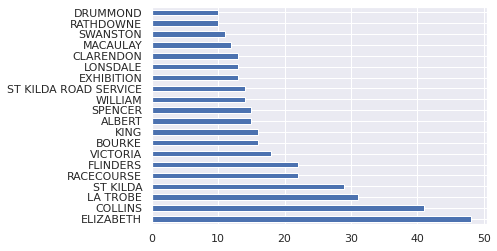

<Figure size 432x288 with 0 Axes>

In [19]:

location_by_accidents[:20].plot(kind='barh')

plt.figure()

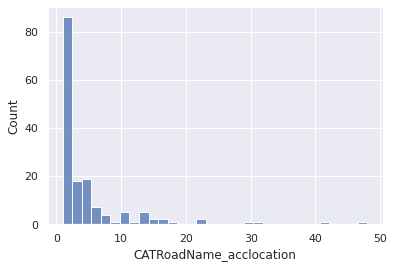

In [20]:
sns.set()
sns.set_style("darkgrid")
sns.histplot(location_by_accidents)

In [21]:
"""A road location with more than 5 bicycle accidents in a year 
is classified as a high-accident location, while one with less than 5 accidents is classified as a low-accident location"""
high_accident_locations=location_by_accidents[location_by_accidents >=5]                
low_accident_locations=location_by_accidents[location_by_accidents < 5]

In [22]:
len(high_accident_locations)/len(location)    #In Melbourne, 26% of the road network has greater than or equal to 5 annual bicylce accidents.

0.26582278481012656

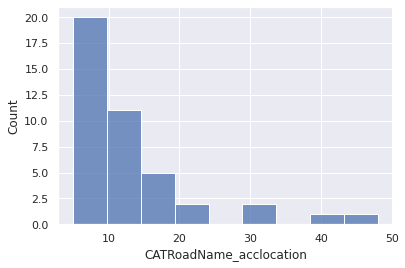

In [23]:
sns.set_style("darkgrid")
sns.histplot(high_accident_locations)

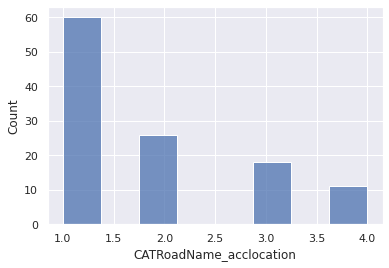

In [24]:
sns.set_style("darkgrid")
sns.histplot(low_accident_locations)

In [25]:
len(location_by_accidents[location_by_accidents == 1])     #Only one bicycle collision has been reported in 60 road lanes.

60

Time

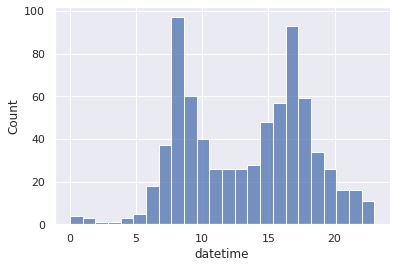

In [28]:
sns.histplot(dataset.datetime.dt.hour,bins=24)    #The highest percentage of accidents occur between the hours of 8 a.m. and 9 a.m., when people are going for work, and 4 – 5 p.m., probably when people are leaving after work.


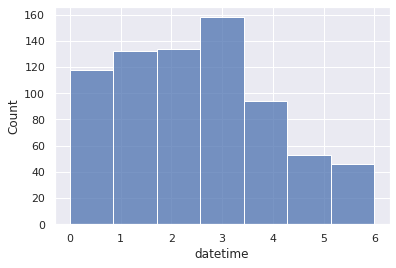

In [29]:
sns.histplot(dataset.datetime.dt.dayofweek,bins=7)    # On Thursdays, the highest number of bicycle accidents occur, however on weekends, the number of accidents is lower.

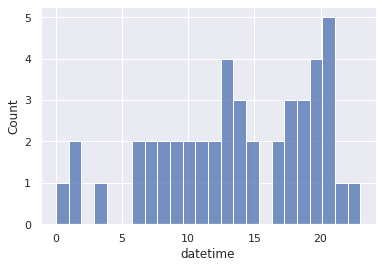

In [30]:
sundays_time=dataset.datetime[dataset.datetime.dt.dayofweek == 6 ]
sns.histplot(sundays_time.dt.hour,bins=24)                                  # On Sundays, the peak hours are 12 p.m. to 2 p.m. and 7 p.m. to 8 p.m.

In [31]:
sundays_time

9     2017-01-15 13:40:00
11    2017-01-15 12:35:00
13    2017-01-29 20:52:00
22    2017-02-05 17:01:00
67    2017-04-09 03:15:00
88    2017-05-14 18:16:00
149   2017-08-20 13:05:00
155   2017-09-03 22:00:00
156   2017-09-10 20:31:00
171   2017-09-24 15:30:00
174   2017-10-15 08:45:00
220   2017-12-17 07:10:00
221   2017-12-17 01:30:00
226   2017-12-31 13:30:00
231   2018-01-14 19:10:00
243   2018-01-28 14:14:00
248   2018-02-04 18:40:00
270   2018-03-04 10:56:00
286   2018-03-25 09:15:00
292   2018-04-01 08:30:00
321   2018-05-13 13:00:00
368   2018-09-16 20:20:00
377   2018-10-07 21:12:00
391   2018-09-09 23:15:00
392   2018-10-28 11:00:00
393   2018-10-28 07:45:00
431   2018-12-16 00:05:00
439   2019-01-13 06:15:00
464   2019-03-03 21:55:00
474   2019-03-17 11:25:00
475   2019-03-17 18:15:00
524   2019-05-26 19:30:00
527   2019-06-02 01:20:00
547   2019-07-28 09:40:00
548   2019-07-28 14:58:00
549   2019-07-28 14:58:00
587   2019-09-29 21:15:00
605   2019-10-13 06:00:00
631   2019-1

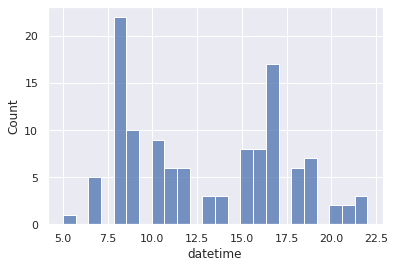

In [32]:
mondays_time=dataset.datetime[dataset.datetime.dt.dayofweek == 0 ]
sns.histplot(mondays_time.dt.hour,bins=24)                                             #ON MONDAYS, BYCICLE ACCIDENTS HAPPEN IN THE MORNING BETWEEN 7.30 AM AND 9 AM, AND IN THE AFTERNOON BETWEEN 4 PM AND 5 30 PM.

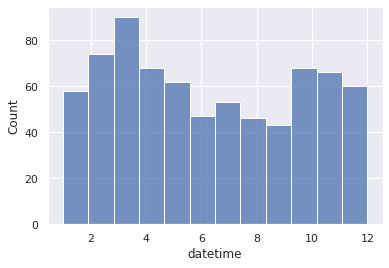

In [33]:
sns.histplot(dataset.datetime.dt.month,bins=12)        #March and then towards the end 

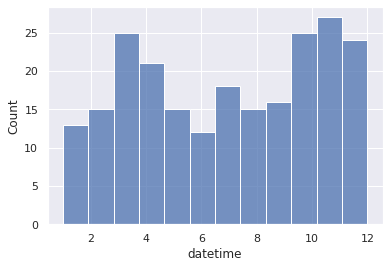

In [38]:
dataset_2019=dataset[dataset.datetime.dt.year == 2019]  
sns.histplot(dataset_2019.datetime.dt.month,bins=12)   


**People**
  

**1.   Number of Persons invloved in the accident**

**2.   Number of Persons injured in the accident**

The data frame includes information about how many victims were involved and  injured in each bicycle accident. We can easily represent the percentage   involvement and injuries using a pie plot 

In [39]:
import plotly.express as px
dataset['number_of_involved']= dataset['NUMPersonsInvolved_accident']
dataset.loc[dataset['NUMPersonsInvolved_accident'] == 1, 'number_of_involved'] = 'Only one person was invloved'
dataset.loc[dataset['NUMPersonsInvolved_accident'] >= 2 , 'number_of_involved'] = '2-5'
dataset.loc[dataset['NUMPersonsInvolved_accident'] > 5 , 'number_of_involved'] = 'More than 5'
fig = px.pie(dataset,names='number_of_involved', title='No of Persons invloved in accidents in 2017-19',color_discrete_sequence=px.colors.diverging.PRGn)
fig.show()

In [40]:
import plotly.express as px
dataset['number_of_injured']= dataset['NUMPersonsInjured_accident']
dataset.loc[dataset['NUMPersonsInjured_accident'] == 0, 'number_of_injured'] = 'No person was injured'
dataset.loc[dataset['NUMPersonsInjured_accident'] > 0 , 'number_of_injured'] = 'Persons Injured'

fig = px.pie(dataset,names='number_of_injured', title='Injuries in 2017-19',color_discrete_sequence=px.colors.diverging.PRGn)
fig.show()

Map

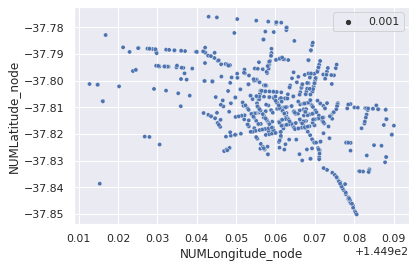

In [41]:
sns.scatterplot(x=dataset.NUMLongitude_node,y=dataset.NUMLatitude_node, size=0.001)                        


In [42]:
m = folium.Map(location=[-37.84442039,144.9785283], control_scale=True, zoom_start=10,attr = "text some",tiles="OpenStreetMap")
dataset_copy=dataset.copy()
for i in range(0,len(dataset_copy)):
  # html to be displayed in the popup 
  html="""
         <h3>Accident Location:</h3> """+\
       """<h5>ROAD_NAME:</h5> """ +str(dataset_copy.iloc[i]['CATRoadName_acclocation'])+\
       """<h5>ROAD_NAME_INT:</h5> """+ str(dataset_copy.iloc[i]['CATRoadNameInt_acclocation'])+\
       """<h5>ROAD_TYPE:</h5> """+ str(dataset_copy.iloc[i]['CATRoadType_acclocation']) +\
       """<h5>ROAD_TYPE_INT:</h5> """+ str(dataset_copy.iloc[i]['CATRoadTypeInt_acclocation'])
  #IFrame 
  iframe = folium.IFrame(html=html, width=200, height=300)
  #popup = folium.Popup(iframe, max_width=2650,parse_html=True) 
  folium.Marker(
  location=[dataset_copy.iloc[i]['NUMLatitude_node'], dataset_copy.iloc[i]['NUMLongitude_node']], 
  popup=folium.Popup(iframe, max_width=2650,parse_html=True) ,
  tooltip=str(dataset_copy.iloc[i]['CATRoadName_acclocation']),
  icon=folium.Icon(color='blue',icon='info-sign'),
  ).add_to(m)
m.save('/content/drive/My Drive/Colab Notebooks/T1_2022/Project/accidents.html')
m      

Pandas Profiling

In [43]:
wrk_final_accident_bicyclists= pd.read_csv('/content/drive/My Drive/Colab Notebooks/T1_2022/Project/data/Accidents_Bicyclists_Melbourne_2017to2020.csv')
profile_6 = ProfileReport(wrk_final_accident_bicyclists, title="Profiling Report of Bicyclists Accidents in Melbourne from 2017-2020 ", html={"style":{"full_width":True}})
profile_6

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]